In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from src.experiments import compare_guarantees_experiment
from src.experiments import bargaining_gap_experiment

# settings

In [10]:
NUMBER_OF_EXPERIMENTS = 100
PRECISION = 10 # 6 decimal places

In [11]:
def calc_raios(data, metric_cols, all_cols, group_cols):
    ratios = pd.DataFrame()
    for g in metric_cols:
        for gd in all_cols:
            if g == gd:
                continue

            ratios[f'{g}/{gd}'] = data[g]/data[gd]
    
    for gc in group_cols:
        ratios[gc] = data[gc]

    return ratios



def base_experiment(data, group_cols):
    random_exp_data = data.groupby(group_cols).first()
    
#     print('data and plot for random experiment')
#     with pd.option_context('display.max_rows', None,):
#         display(random_exp_data)

    random_exp_data.plot(figsize=(20, 10))
    plt.show()

# 1. Comparing guarantees

In [12]:
cg_exp = compare_guarantees_experiment.CompareGuaranteeExperiment()
cg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
cg_exp.columns

{'dc_gr',
 'familiar_share_gr',
 'goods_num',
 'max_min_gr',
 'min_max_gr',
 'sb_gr',
 'utility_type'}

In [13]:
data = cg_exp.load_experiment()

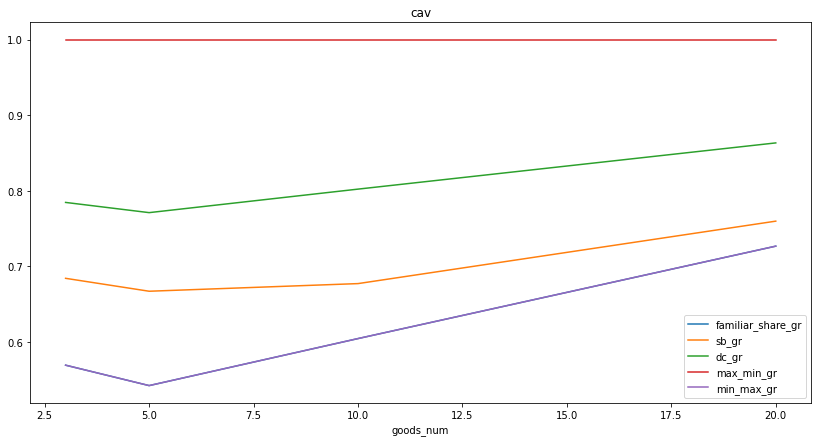

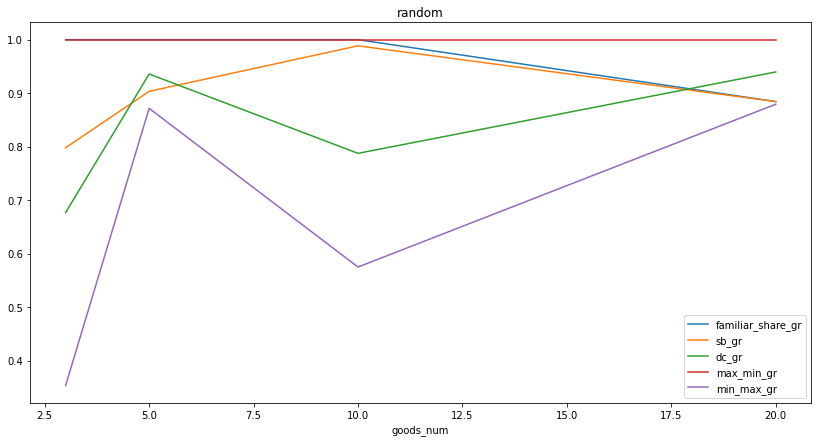

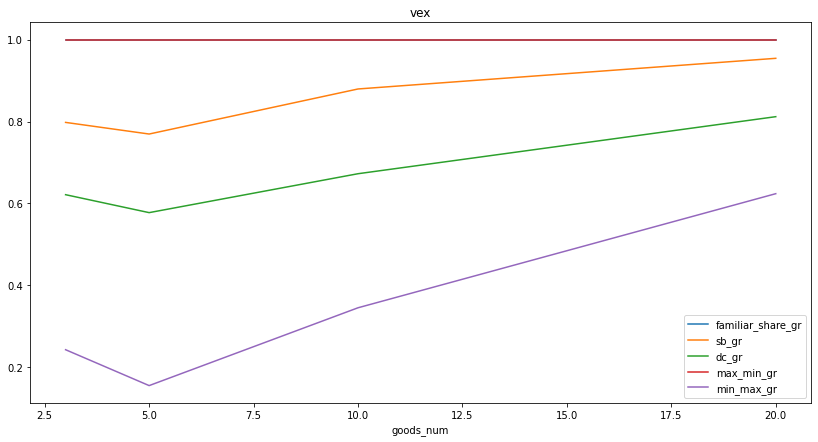

In [14]:
r_data = data.groupby(['utility_type', 'goods_num']).first()
for i in r_data.index.unique('utility_type'):
    r_data.loc[i].plot(figsize=(14, 7), title=i, style='-')

as seen from the graph all guarantees values lies beetween min_max and max_min guarantees. </br>
now i will try to find experiment where this condition violates

In [15]:
guarantees_columns = [
    'dc_gr',
    'familiar_share_gr',
    'max_min_gr',
    'min_max_gr',
    'sb_gr',
]

data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]

,familiar_share_gr,utility_type,sb_gr,dc_gr,goods_num,max_min_gr,min_max_gr


In [16]:
data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]

,familiar_share_gr,utility_type,sb_gr,dc_gr,goods_num,max_min_gr,min_max_gr


Looks like there is no violation for used prcision (10 decimal digits)

### Calculate ratios statistics

In [17]:
ratios = calc_raios(data, ('dc_gr','familiar_share_gr', 'sb_gr'), guarantees_columns, ['utility_type', 'goods_num'])

Ratios mean

In [18]:
ratios.groupby(['utility_type', 'goods_num']).mean()

dc_gr/familiar_share_gr  dc_gr/max_min_gr  \
utility_type goods_num                                              
cav          3                         1.185096          0.871139   
             5                         1.223183          0.850038   
             10                        1.234959          0.842695   
             20                        1.237223          0.840377   
random       3                         0.976889          0.890746   
             5                         1.023681          0.890373   
             10                        0.986569          0.899563   
             20                        1.010431          0.928159   
vex          3                         0.814904          0.814904   
             5                         0.776817          0.776817   
             10                        0.765041          0.765041   
             20                        0.762777          0.762777   

                        dc_gr/min_max_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  1.185096     1.123910   
             5                  1.223183     1.145349   
             10                 1.234959     1.152624   
             20                 1.237223     1.159473   
random       3                  1.166604     0.981374   
             5                  1.157941     1.016177   
             10                 1.133430     0.991196   
             20                 1.085740     1.008693   
vex          3                  1.373513     0.860904   
             5                  1.501750     0.832036   
             10                 1.509745     0.822761   
             20                 1.481991     0.817052   

                        familiar_share_gr/dc_gr  familiar_share_gr/max_min_gr  \
utility_type goods_num                                                          
cav          3                         0.848518                      0.742277   
             5                         0.821060                      0.700076   
             10                        0.811878                      0.685390   
             20                        0.809329                      0.680755   
random       3                         1.046646                      0.927121   
             5                         0.995738                      0.883605   
             10                        1.023865                      0.919007   
             20                        0.993416                      0.921915   
vex          3                         1.242003                      1.000000   
             5                         1.301266                      1.000000   
             10                        1.316435                      1.000000   
             20                        1.315606                      1.000000   

                        familiar_share_gr/min_max_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              1.000000                 0.951853   
             5                              1.000000                 0.939256   
             10                             1.000000                 0.935001   
             20                             1.000000                 0.937970   
random       3                              1.233799                 1.012226   
             5                              1.160922                 0.997306   
             10                             1.164632                 1.006256   
             20                             1.078789                 0.998567   
vex          3                              1.747025                 1.063392   
             5                              2.003499                 1.077465   
             10                             2.019490                 1.079190   
             20                             1.963981                 1

Ratios variance

In [19]:
ratios.groupby(['utility_type', 'goods_num']).var()

dc_gr/familiar_share_gr  dc_gr/max_min_gr  \
utility_type goods_num                                              
cav          3                         0.007845          0.002419   
             5                         0.006440          0.001592   
             10                        0.004080          0.000879   
             20                        0.002039          0.000439   
random       3                         0.021780          0.005166   
             5                         0.019074          0.003414   
             10                        0.009672          0.001695   
             20                        0.003866          0.000551   
vex          3                         0.007845          0.007845   
             5                         0.006440          0.006440   
             10                        0.004080          0.004080   
             20                        0.002039          0.002039   

                        dc_gr/min_max_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  0.007845     0.002483   
             5                  0.006440     0.001462   
             10                 0.004080     0.000907   
             20                 0.002039     0.000508   
random       3                  0.023585     0.011403   
             5                  0.014839     0.012036   
             10                 0.005941     0.007540   
             20                 0.001162     0.003454   
vex          3                  0.095465     0.003192   
             5                  0.150407     0.002258   
             10                 0.085723     0.001632   
             20                 0.034375     0.000865   

                        familiar_share_gr/dc_gr  familiar_share_gr/max_min_gr  \
utility_type goods_num                                                          
cav          3                         0.004072                      0.009674   
             5                         0.002956                      0.006366   
             10                        0.001743                      0.003514   
             20                        0.000874                      0.001756   
random       3                         0.024410                      0.013283   
             5                         0.020529                      0.012761   
             10                        0.010968                      0.006384   
             20                        0.003787                      0.003438   
vex          3                         0.019404                      0.000000   
             5                         0.018944                      0.000000   
             10                        0.012814                      0.000000   
             20                        0.006216                      0.000000   

                        familiar_share_gr/min_max_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              0.000000                 0.003308   
             5                              0.000000                 0.002608   
             10                             0.000000                 0.001412   
             20                             0.000000                 0.000700   
random       3                              0.112239                 0.004776   
             5                              0.075688                 0.002543   
             10                             0.034319                 0.000882   
             20                             0.006305                 0.000172   
vex          3                              0.381862                 0.006511   
             5                              0.601629                 0.005321   
             10                             0.342894                 0.002771   
             20                             0.137502                 0

# 2. Bargaining gap same pairs

In [20]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()
bg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bg_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

In [21]:
bg_group_cols = {'utility_type', 'goods_num', 'mix_param', 'scale_param'}
bg_data = bg_exp.load_experiment()

/Users/kirill-adayev/HSE/fair_division_with_money/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


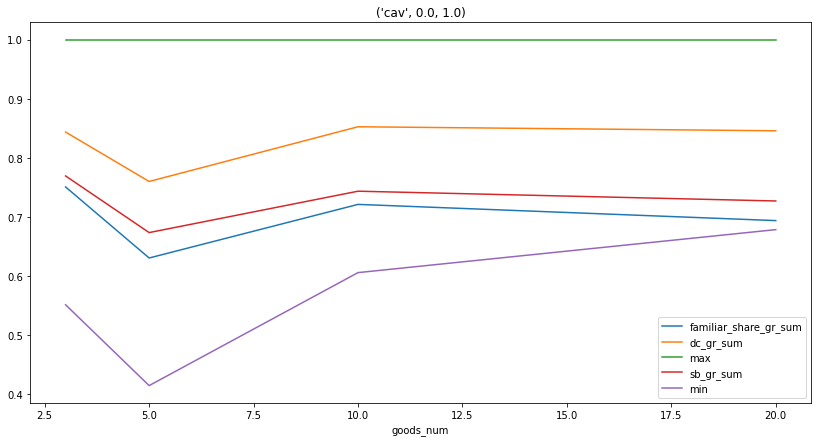

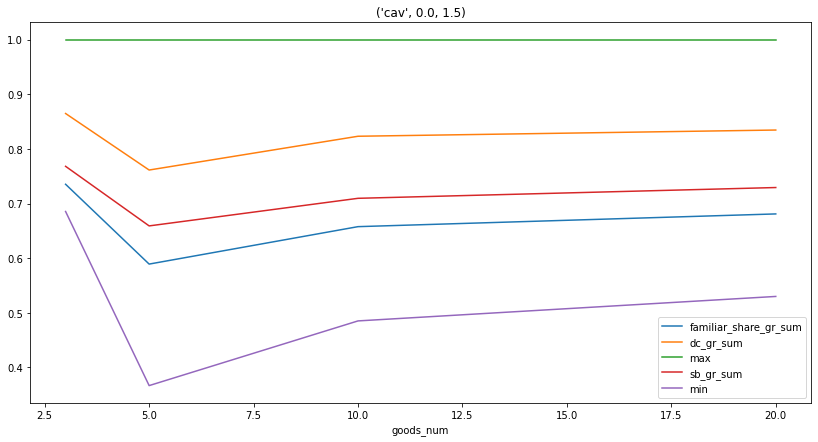

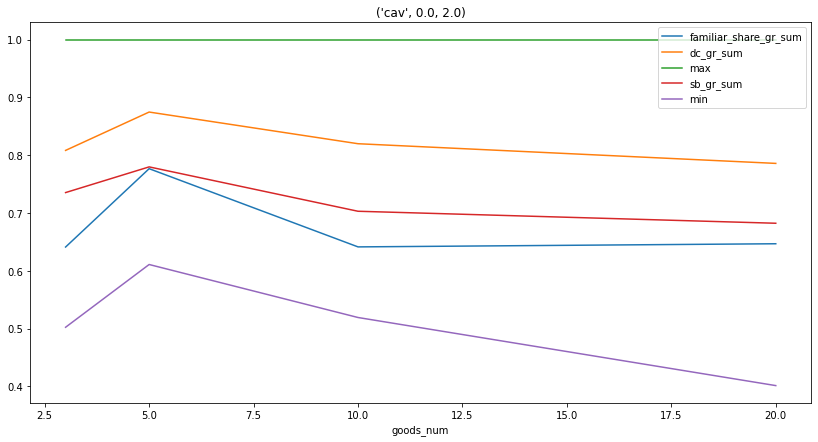

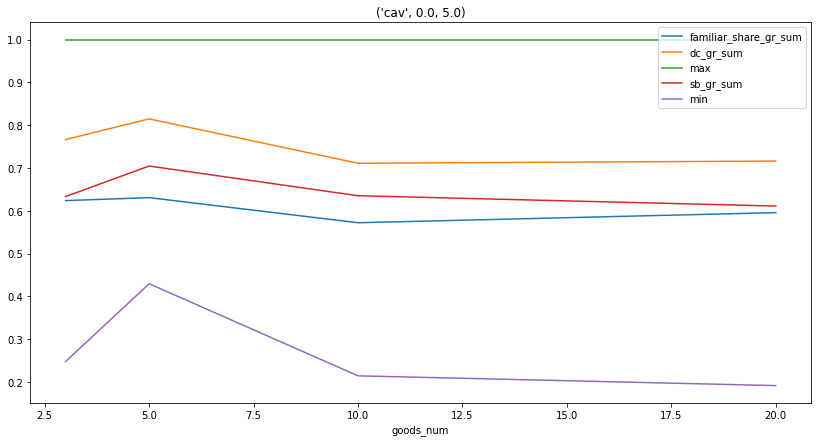

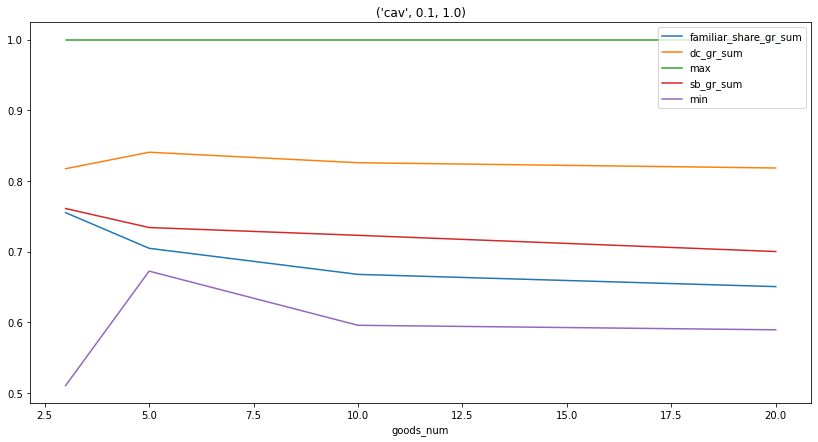

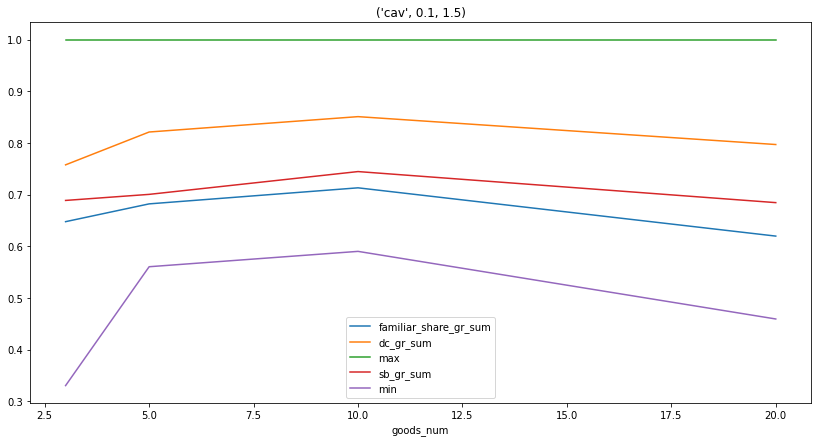

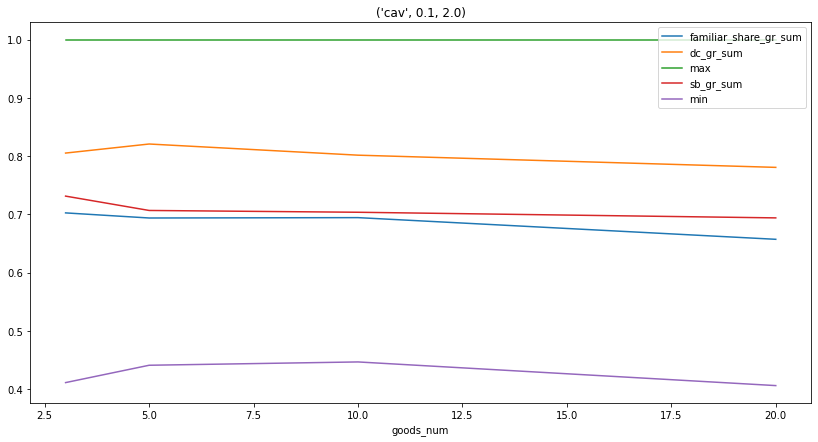

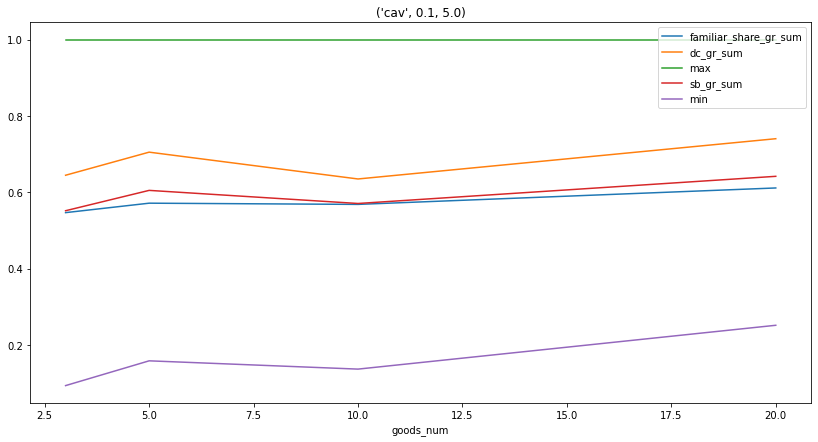

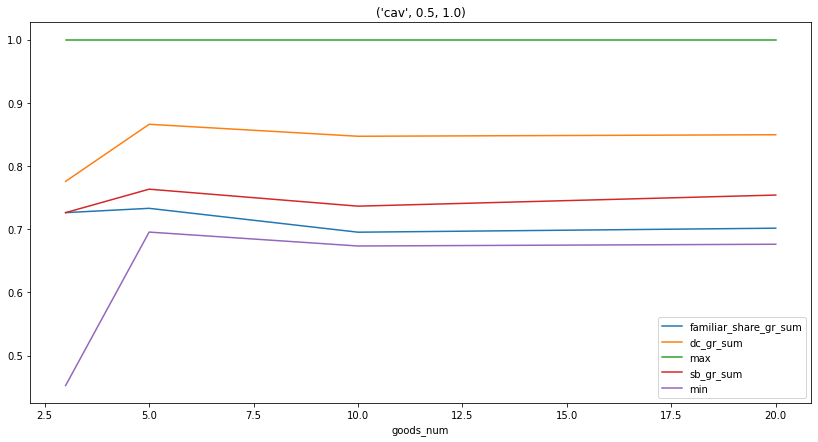

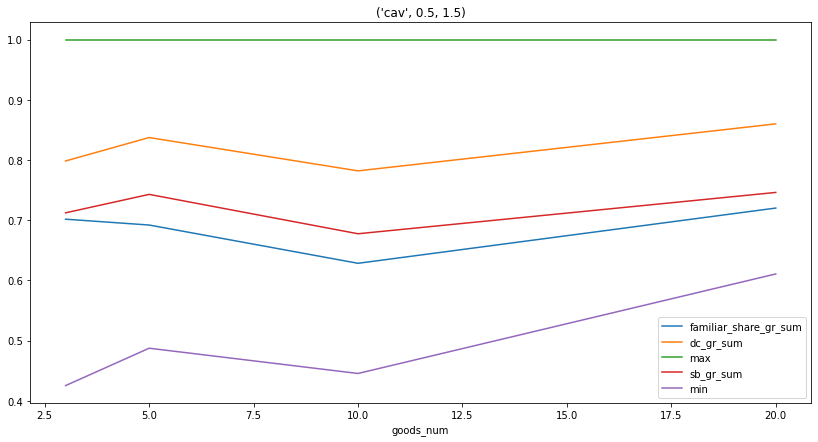

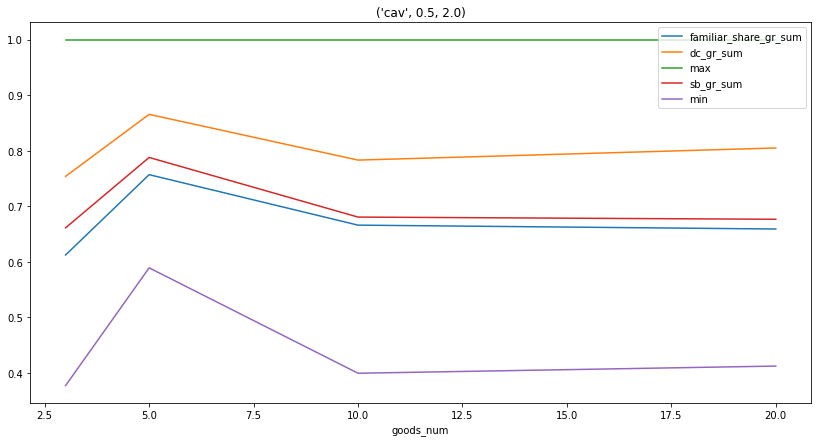

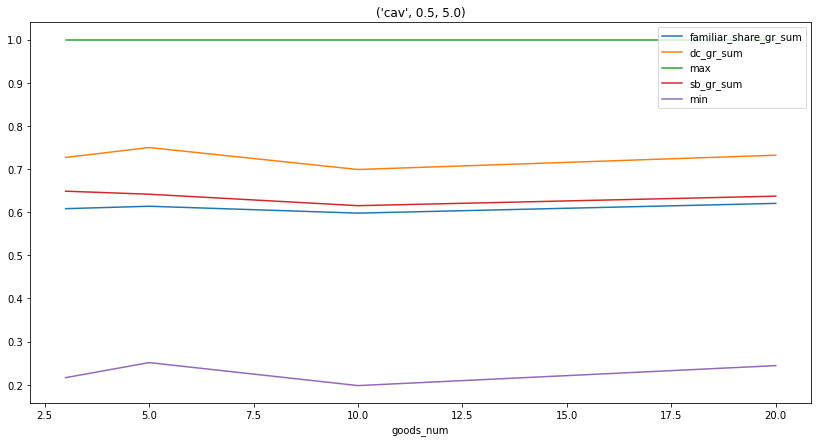

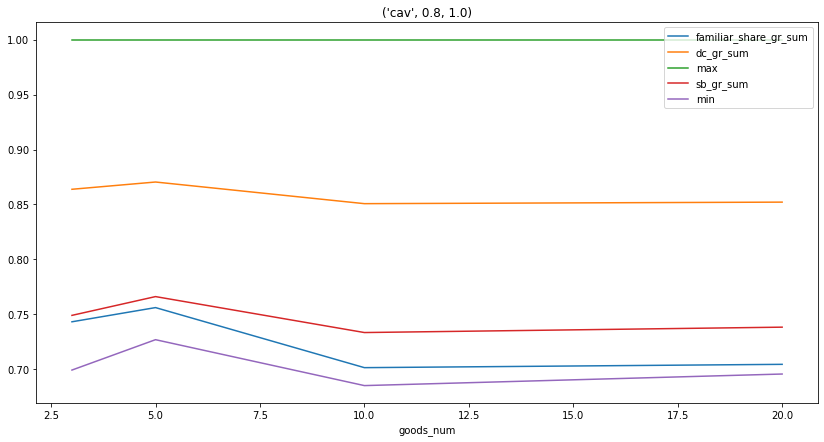

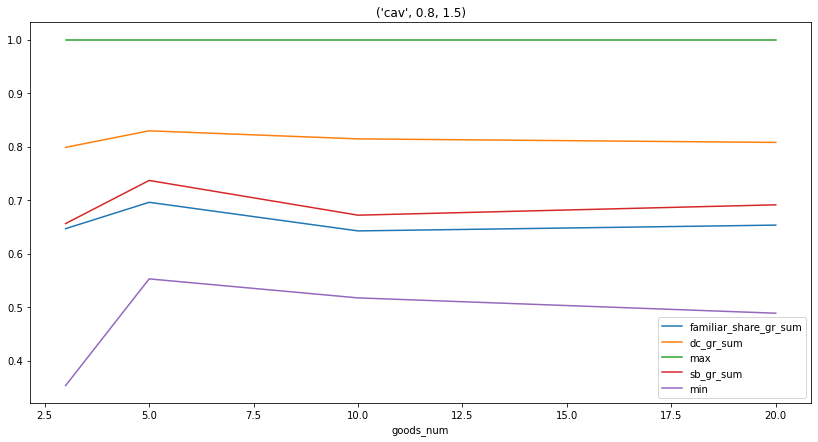

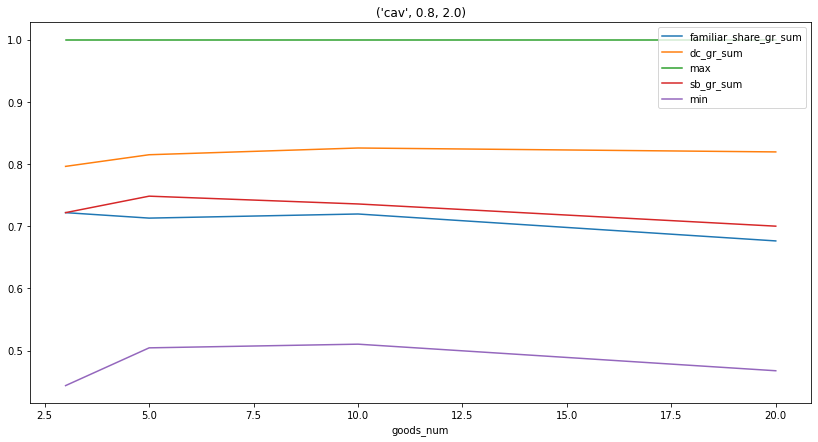

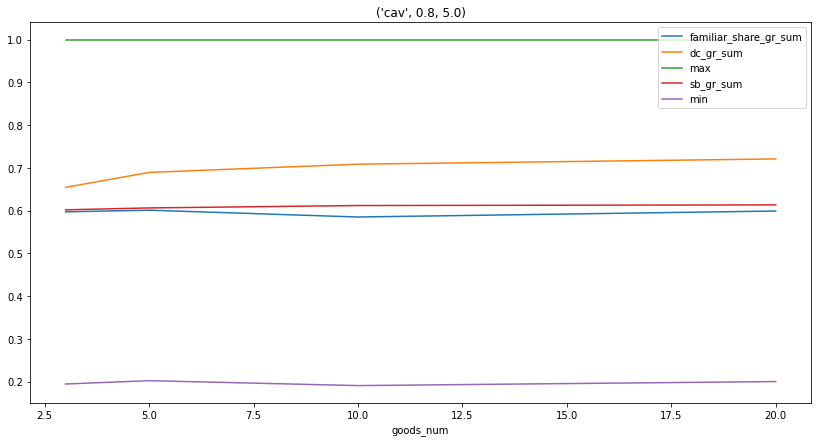

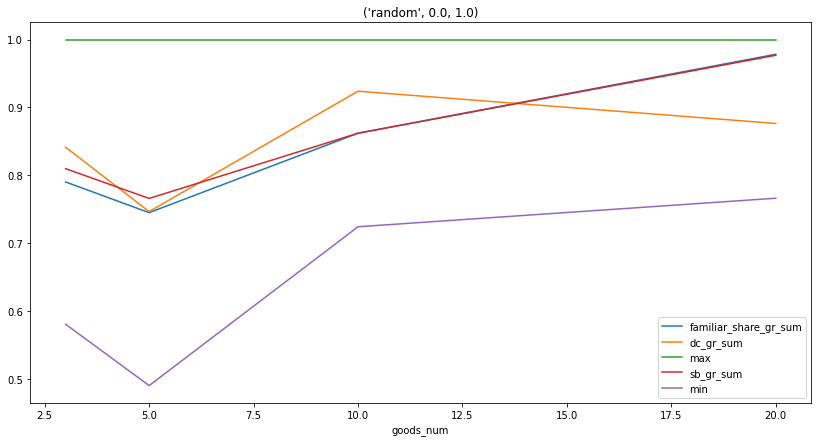

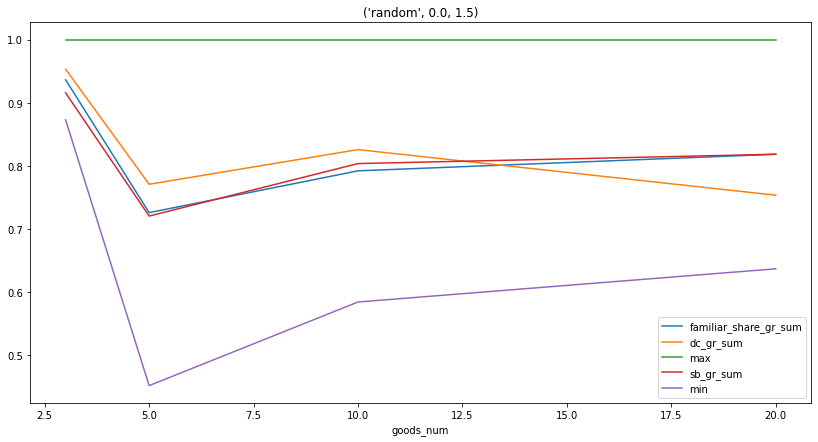

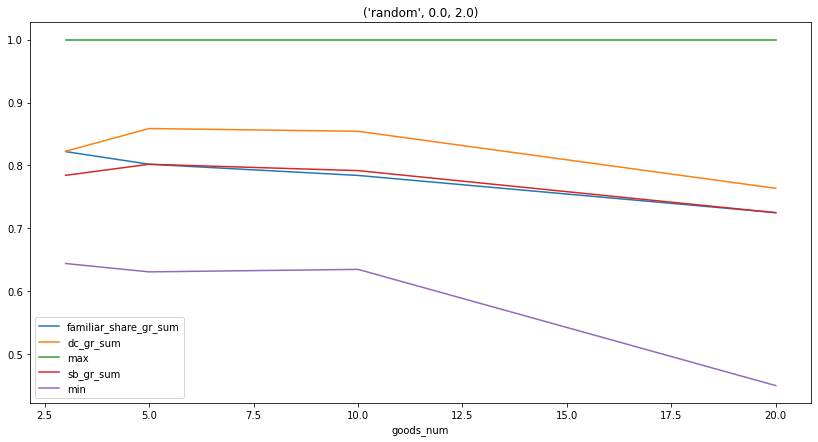

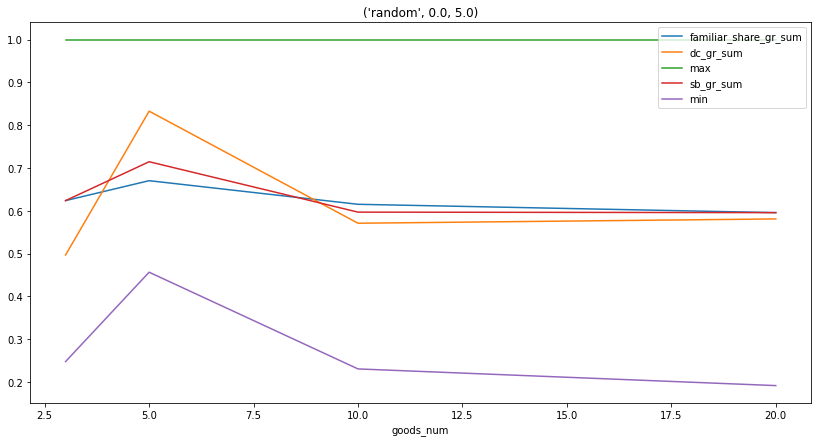

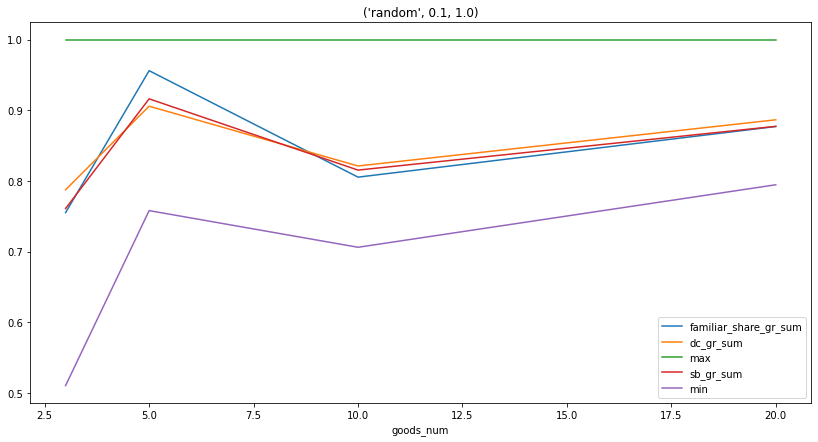

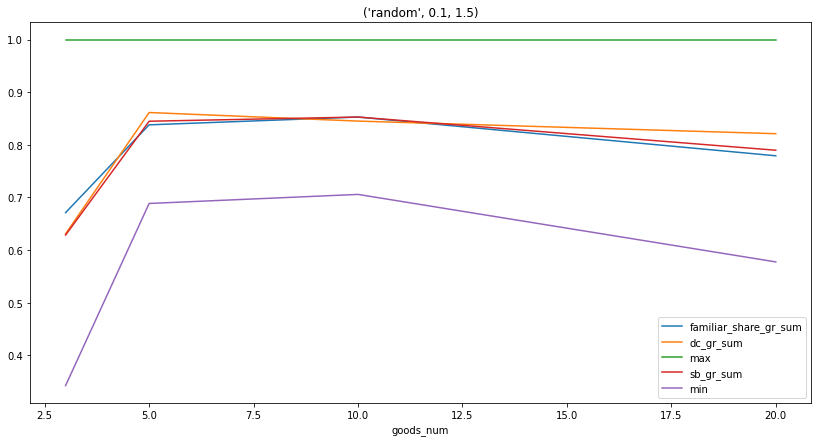

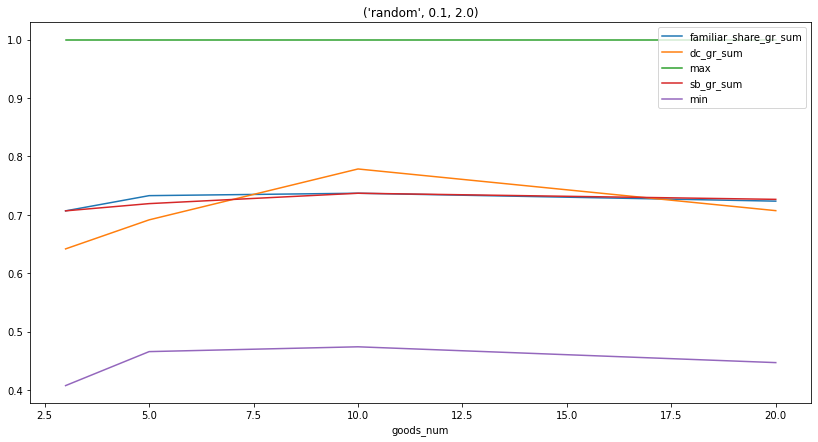

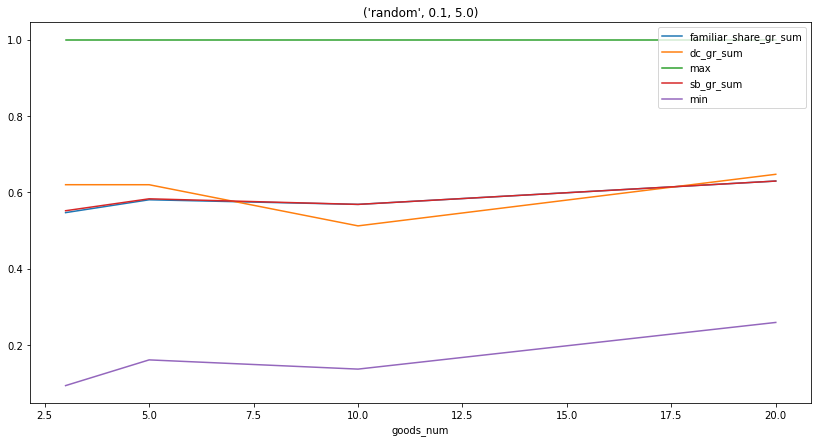

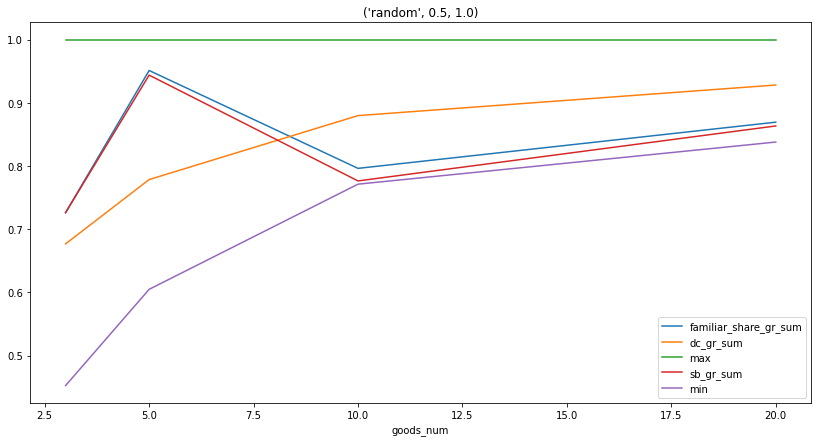

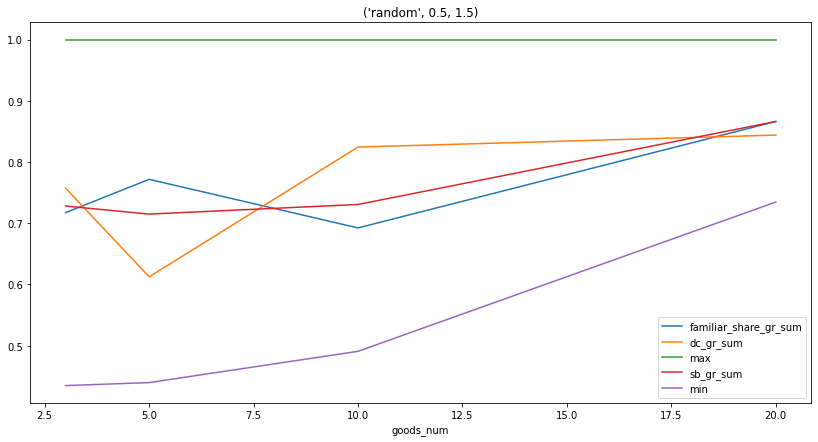

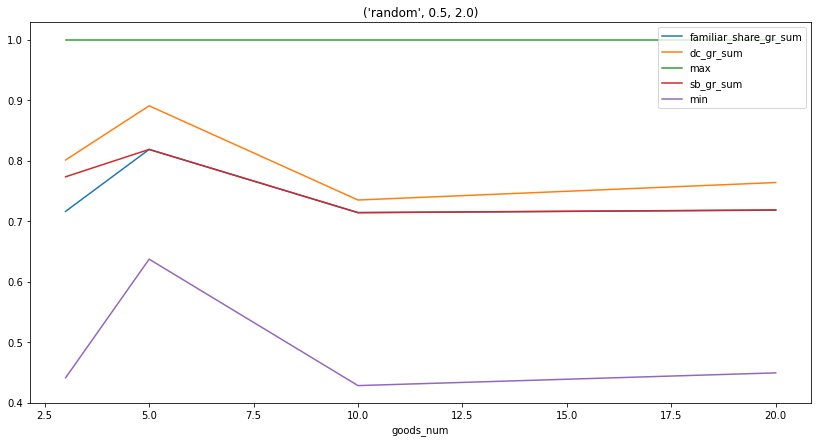

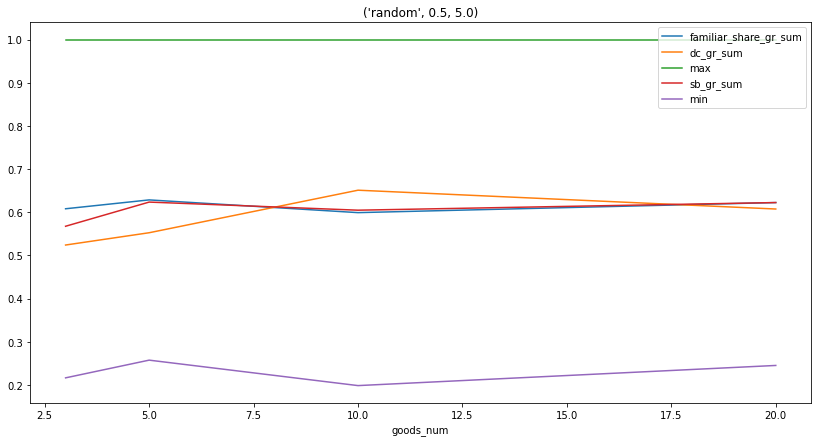

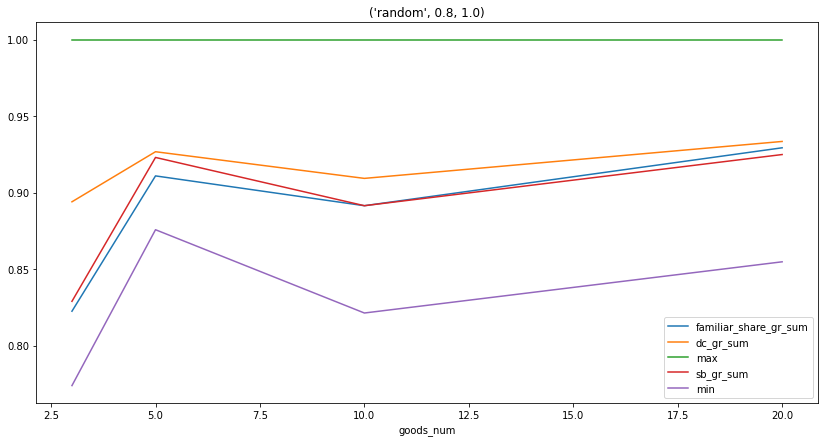

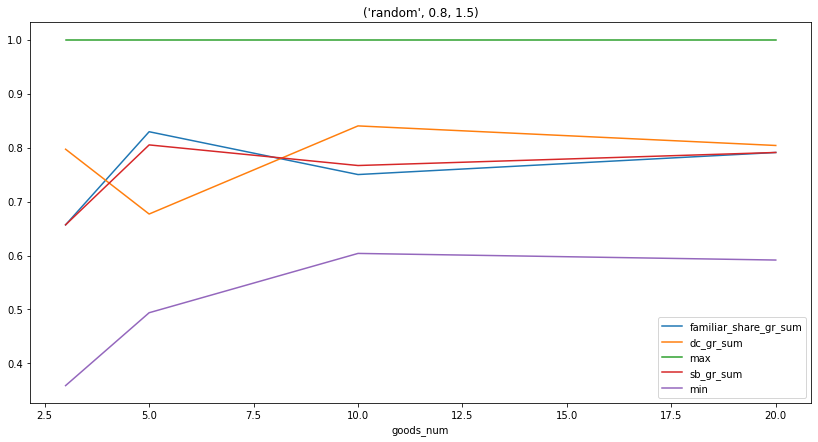

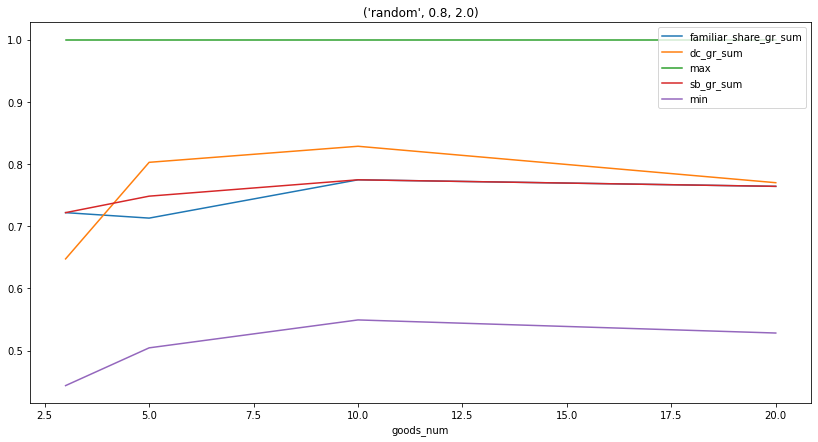

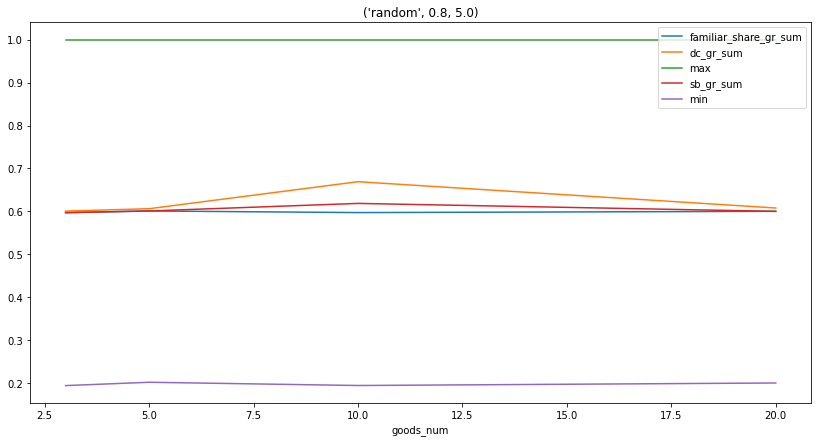

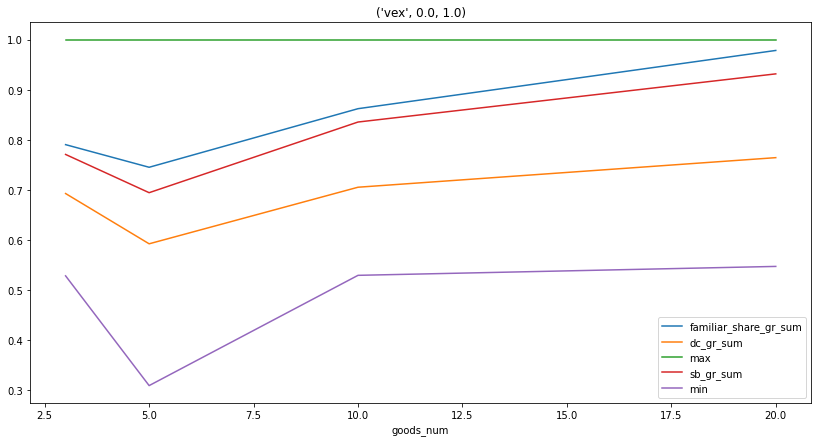

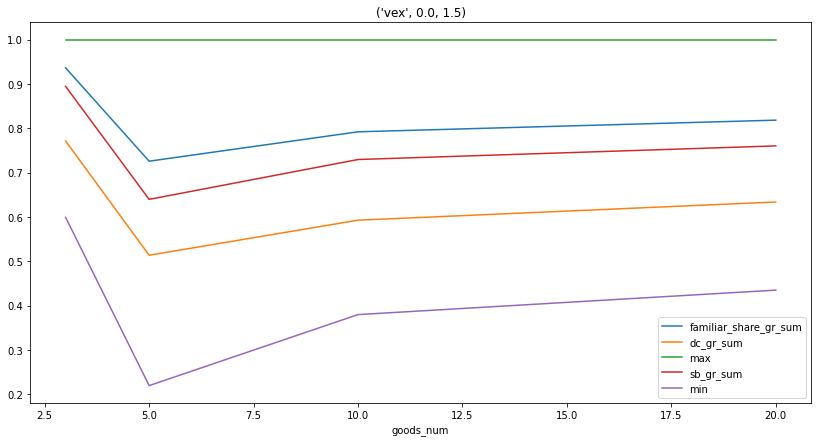

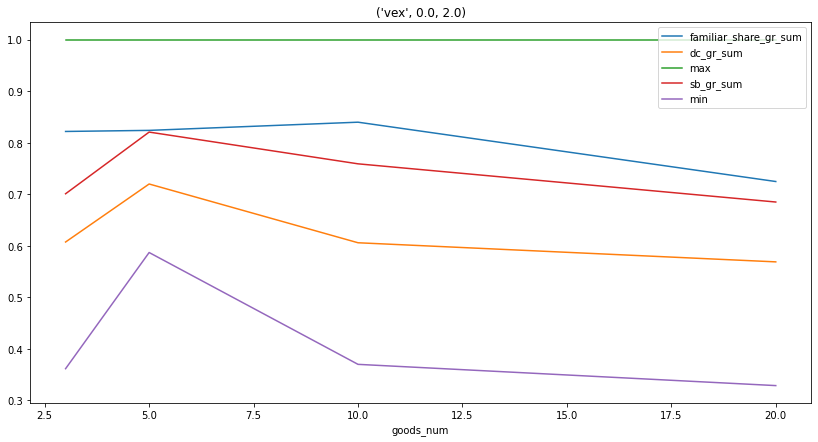

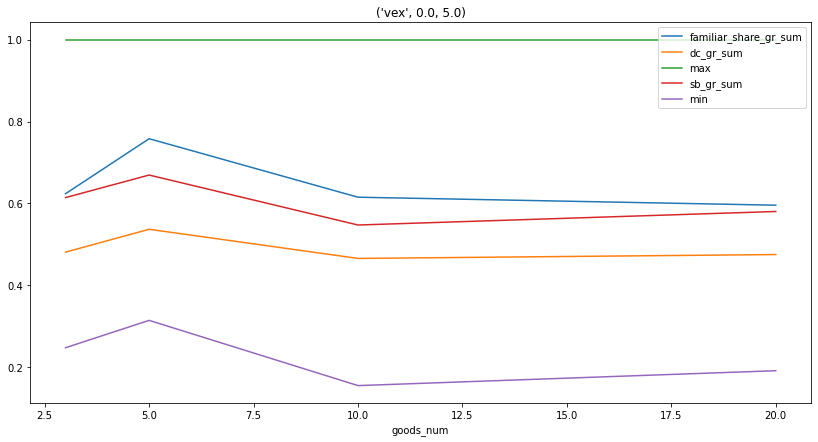

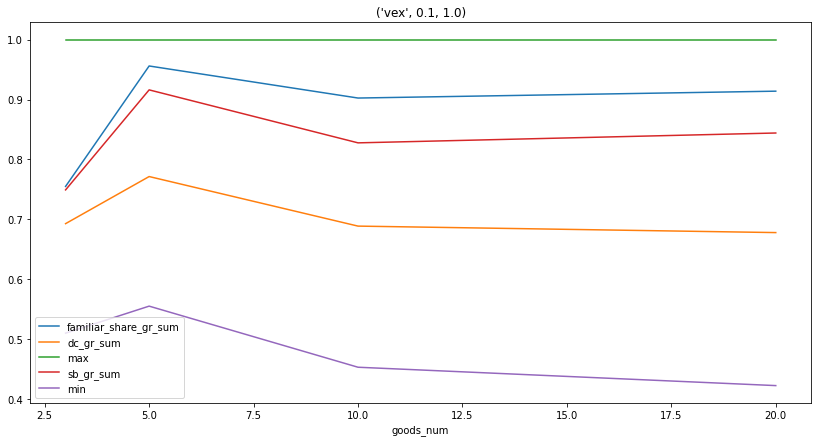

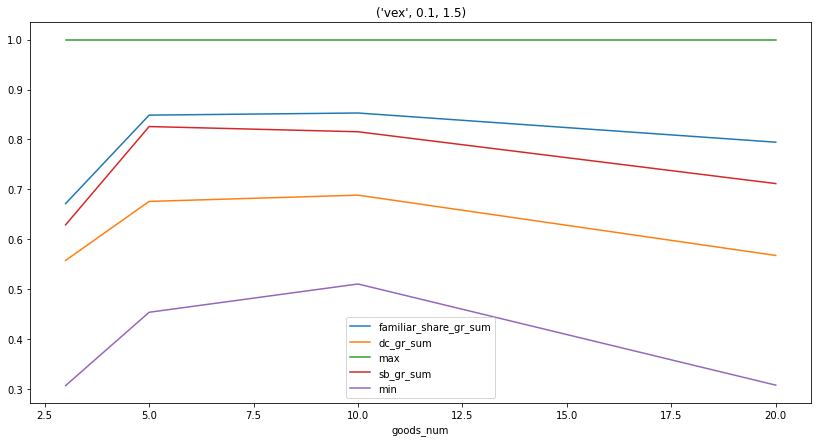

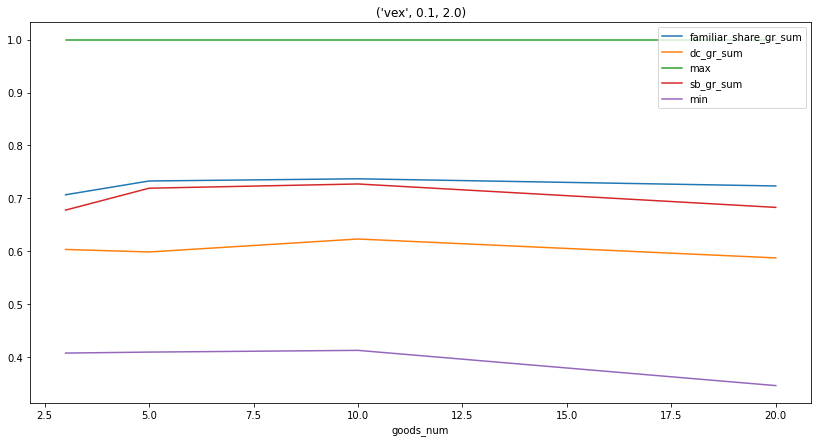

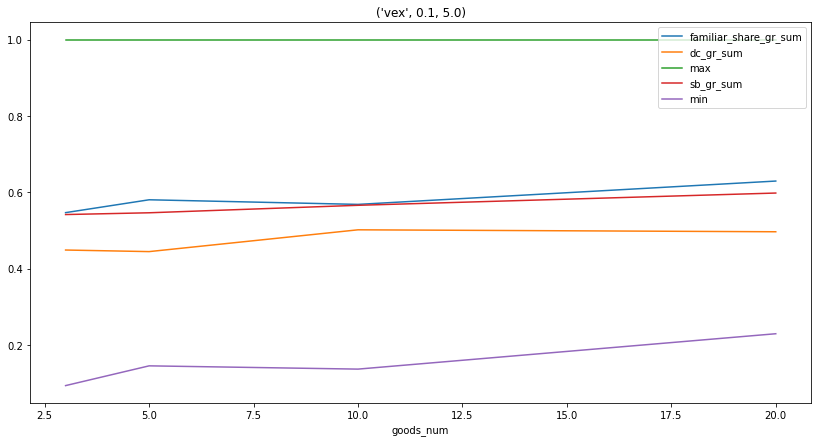

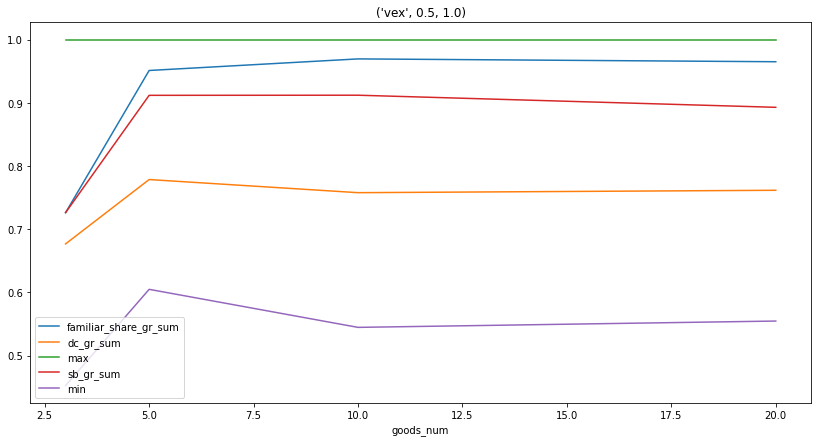

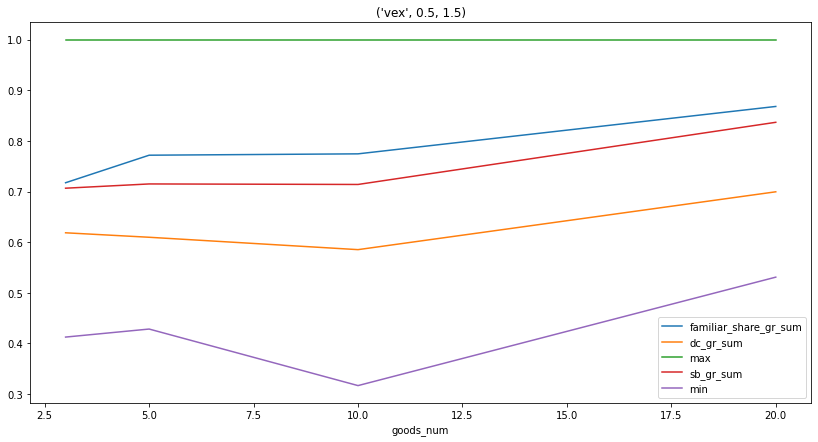

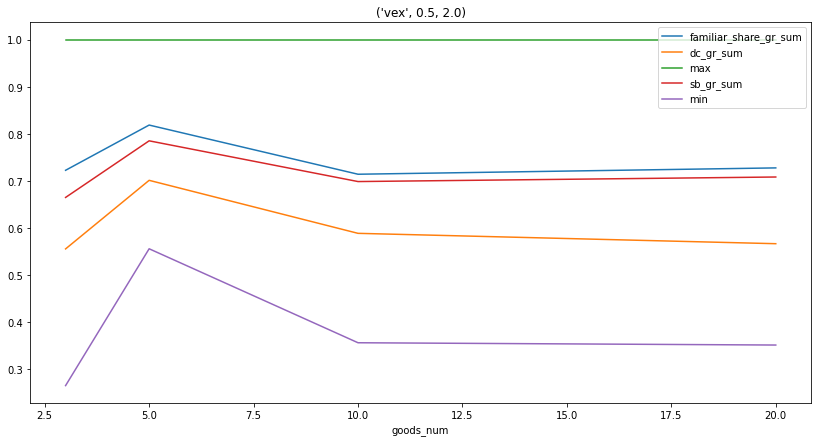

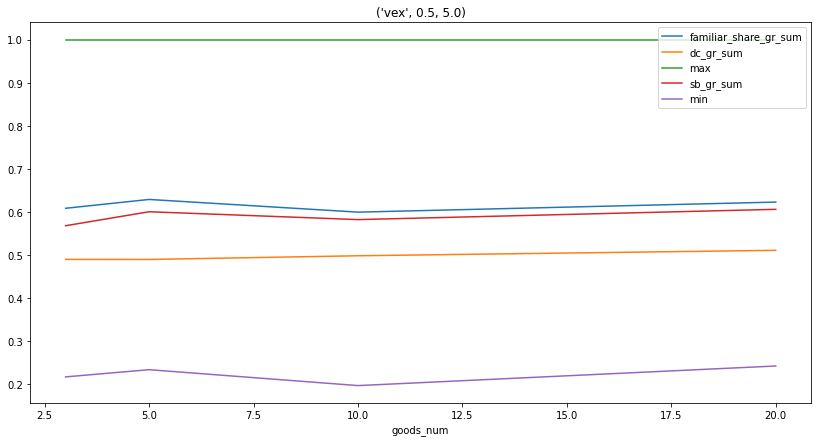

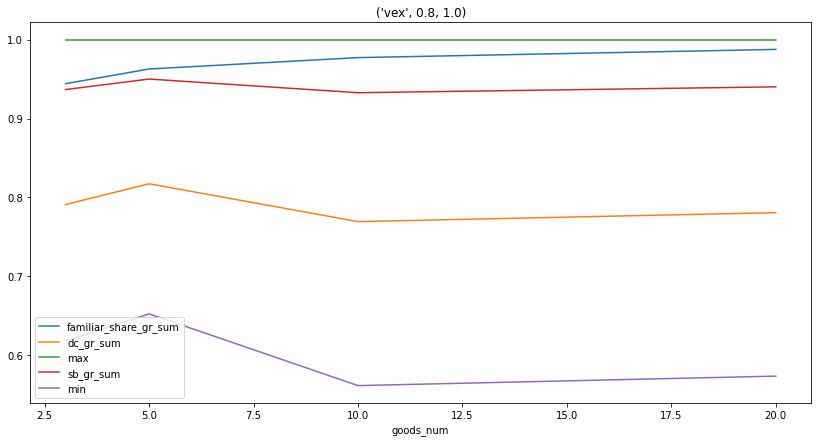

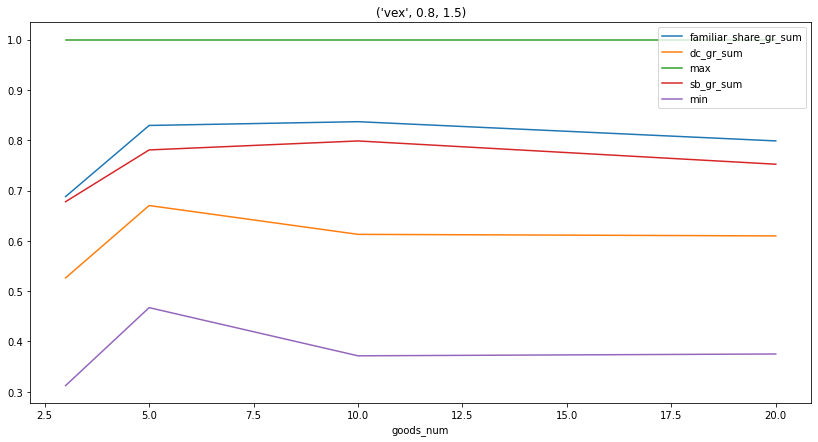

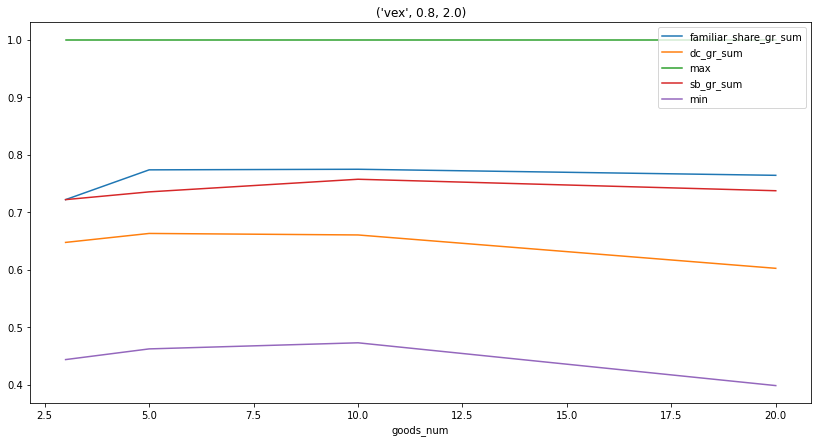

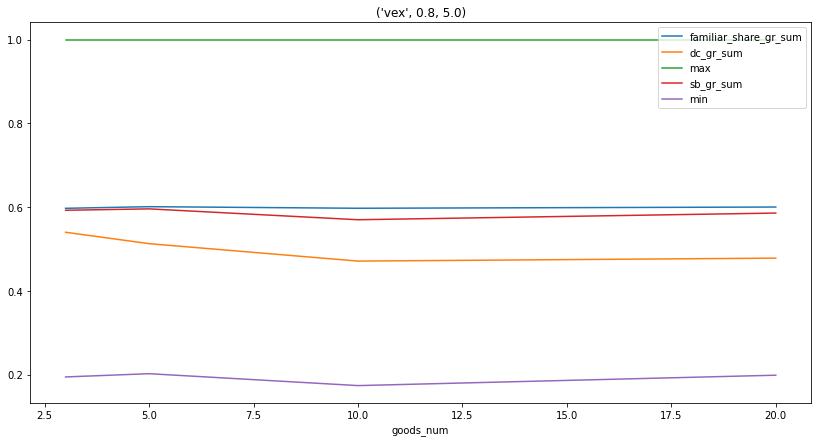

In [22]:
bg_r_data = bg_data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).first()
for i in bg_r_data.index.droplevel('goods_num').unique():
    bg_r_data.loc[(*i, slice(None))].droplevel(['utility_type', 'mix_param', 'scale_param']).plot(
        figsize=(14, 7), title=str(i), style='-'
    )

In [24]:
sum_guarantees_columns = [
    'dc_gr_sum',
    'familiar_share_gr_sum',
    'max',
    'min',
    'sb_gr_sum',
]
bg_data[bg_data['max'].round(PRECISION) < bg_data[sum_guarantees_columns].max(axis=1).round(PRECISION)]

,familiar_share_gr_sum,scale_param,utility_type,dc_gr_sum,mix_param,goods_num,max,sb_gr_sum,min


In [25]:
bg_data[bg_data['min'].round(PRECISION) > bg_data[sum_guarantees_columns].min(axis=1).round(PRECISION)]

,familiar_share_gr_sum,scale_param,utility_type,dc_gr_sum,mix_param,goods_num,max,sb_gr_sum,min


all sum guarantees lies between min and max

### Calculate ratios statistics

In [26]:
bg_ratios = calc_raios(
    bg_data, 
    ('dc_gr_sum','familiar_share_gr_sum', 'sb_gr_sum'), 
    sum_guarantees_columns,
    bg_group_cols
)

In [27]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).mean())

dc_gr_sum/familiar_share_gr_sum  \
mix_param utility_type goods_num scale_param                                    
0.0       cav          3         1.0                                 1.171974   
                                 1.5                                 1.183031   
                                 2.0                                 1.177382   
                                 5.0                                 1.174265   
                       5         1.0                                 1.207158   
                                 1.5                                 1.213692   
                                 2.0                                 1.214864   
                                 5.0                                 1.214542   
                       10        1.0                                 1.233146   
                                 1.5                                 1.231564   
                                 2.0                                 1.232738   
                                 5.0                                 1.228867   
                       20        1.0                                 1.243946   
                                 1.5                                 1.235171   
                                 2.0                                 1.232161   
                                 5.0                                 1.242948   
          random       3         1.0                                 1.007904   
                                 1.5                                 1.002095   
                                 2.0                                 0.979169   
                                 5.0                                 0.989497   
                       5         1.0                                 0.993193   
                                 1.5                                 0.997782   
                                 2.0                                 1.021057   
                                 5.0                                 0.999463   
                       10        1.0                                 1.007360   
                                 1.5                                 0.994803   
                                 2.0                                 1.008217   
                                 5.0                                 0.992081   
                       20        1.0                                 0.999998   
                                 1.5                                 0.994963   
                                 2.0                                 1.004225   
                                 5.0                                 0.989407   
          vex          3         1.0                                 0.828026   
                                 1.5                                 0.816969   
                                 2.0                                 0.822618   
                                 5.0                                 0.825735   
                       5         1.0                                 0.792842   
                                 1.5                                 0.786308   
                                 2.0                                 0.785136   
                                 5.0                                 0.785458   
                       10        1.0                                 0.766854   
                                 1.5                                 0.768436   
                                 2.0                                 0.767262   
                                 5.0                                 0.771133   
                       20        1.0                                 0.756054   
                                 1.5                                 0.764829   
                                 2.0                                 0.767839   
                                 5.0                                 0.757052

In [28]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).var())

dc_gr_sum/familiar_share_gr_sum  \
mix_param utility_type goods_num scale_param                                    
0.0       cav          3         1.0                                 0.003851   
                                 1.5                                 0.004573   
                                 2.0                                 0.004785   
                                 5.0                                 0.006622   
                       5         1.0                                 0.003098   
                                 1.5                                 0.002885   
                                 2.0                                 0.004376   
                                 5.0                                 0.005403   
                       10        1.0                                 0.001999   
                                 1.5                                 0.001831   
                                 2.0                                 0.002085   
                                 5.0                                 0.003189   
                       20        1.0                                 0.001081   
                                 1.5                                 0.001034   
                                 2.0                                 0.001248   
                                 5.0                                 0.001533   
          random       3         1.0                                 0.013125   
                                 1.5                                 0.010847   
                                 2.0                                 0.014984   
                                 5.0                                 0.015408   
                       5         1.0                                 0.007170   
                                 1.5                                 0.009117   
                                 2.0                                 0.009598   
                                 5.0                                 0.011210   
                       10        1.0                                 0.005755   
                                 1.5                                 0.005607   
                                 2.0                                 0.005881   
                                 5.0                                 0.007210   
                       20        1.0                                 0.002315   
                                 1.5                                 0.003010   
                                 2.0                                 0.002441   
                                 5.0                                 0.003294   
          vex          3         1.0                                 0.003851   
                                 1.5                                 0.004573   
                                 2.0                                 0.004785   
                                 5.0                                 0.006622   
                       5         1.0                                 0.003098   
                                 1.5                                 0.002885   
                                 2.0                                 0.004376   
                                 5.0                                 0.005403   
                       10        1.0                                 0.001999   
                                 1.5                                 0.001831   
                                 2.0                                 0.002085   
                                 5.0                                 0.003189   
                       20        1.0                                 0.001081   
                                 1.5                                 0.001034   
                                 2.0                                 0.001248   
                                 5.0                                 0.001533